对于虚假/正宗食谱表的单个分析

In [1]:
import bz2
import pandas as pd
import spacy
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from nltk import FreqDist
import random

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'spacy'

In [2]:
IO = "D:\\研2\\732A92 Text Mining\\\project\\recipes.xlsx"

total = pd.read_excel(io = IO, sheet_name = "xujia")     # 241
# total = pd.read_excel(io = IO, sheet_name = "zhengzong")     # 241

total["instruction"] = [s.lower().replace("\n"," ") for s in total["instruction"]]   # 全小写, 去除\n

In [3]:
total

,name,instruction,label
0,General Tso’s Chicken,toss the chicken thighs with the quarter cup o...,1
1,Easy Sesame Chicken,to make the sauce mix all the ingredients toge...,1
2,Chinese Honey Chicken,in a large bowl add the egg whites and whisk u...,1
3,Chinese Lemon Chicken,slice the chicken breasts in half butterflied ...,1
4,Panda Express Orange Chicken,to make the sauce combine the 1 tablespoon cor...,1
...,...,...,...
236,Jungguk-naengmyeon,1.soak the brisket in a bowl of water and set ...,1
237,Kkanpunggi,"prep the chicken combine the chicken, ginger,...",1
238,Kkanpung saeu,"clean the shrimp, drain, and pat dry with pape...",1
239,Rajogi,chicken flesh eating beomurinda put the cut ch...,1


In [4]:
nlp = spacy.load('en_core_web_lg') # 用大(large)词典

NameError: name 'spacy' is not defined

统计所有虚假中餐的动名词

In [133]:
# data1 = total.loc[total.label == 1]["instruction"]  # 所用虚假中餐的菜谱
data1 = total["instruction"]
nouns1 = []
verbs1 = []
nv1 = []
for recipe in data1:
    doc = nlp(recipe)
    lines = []
    for token in doc:
        p = token.pos_
        if token.is_stop == False and token.lemma_.isalpha() == True and len(token)>=2:
            if(p=="NOUN"):
                nouns1.append(token.lemma_)
            elif(p=="VERB"):
                verbs1.append(token.lemma_)
            lines.append(token.lemma_)
    nv1.append(lines)

In [113]:
" ".join(nv1[0])

'add small pinch salt sesame oil mince beef mix set aside mix tablespoon cornstarch tablespoon water small bowl water starch cut tofu square cube bring large water boil add pinch salt slide tofu cook minute drain wok heat tablespoon oil fry mince meat crispy transfer beef leave oil fry doubanjiang minute slow fire add garlic scallion white ginger ferment black bean cook second aroma mix pepper flake add water seasoning bring boil high fire gently slide tofu cube add light soy sauce heat boil simmer minute add chop garlic green stir water starch pour half mixture simmer pot wait second pour half slightly taste tofu add pinch salt salty way feel spicy add sugar milder taste carefully broth hot point transfer seasoning stick tofu cube sprinkle szechuan peppercorn powder chop garlic green serve immediately steam rice'

In [114]:
len(nv1)

241

7921
481
[('add', 699), ('fry', 325), ('mix', 281), ('cook', 257), ('serve', 242), ('transfer', 240), ('stir', 197), ('cut', 187), ('set', 180), ('heat', 164), ('turn', 159), ('cover', 153), ('pour', 145), ('use', 136), ('soak', 125), ('place', 122), ('remove', 115), ('boil', 110), ('bring', 105), ('prepare', 99), ('chop', 90), ('simmer', 89), ('steam', 86), ('continue', 85), ('cool', 82), ('dry', 79), ('drain', 76), ('marinate', 72), ('let', 71), ('wash', 62), ('leave', 56), ('knead', 55), ('combine', 54), ('roll', 54), ('mince', 48), ('need', 46), ('shape', 45), ('brush', 45), ('spread', 44), ('slice', 43)]


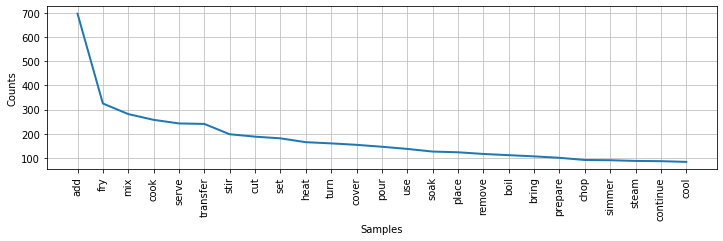

In [115]:
cv1 = FreqDist(verbs1)
print(sum(cv1.values()))  # 动词总数量
print(len(cv1))           # 动词的种类
n = 20
print([(k,v) for k,v in cv1.most_common(40)])
figsize(12, 3)
cv1.plot(25)

In [116]:
# 基础食物的名单 来自USDA 2019 12月 https://fdc.nal.usda.gov/download-datasets.html
# df = pd.read_csv("all_branded_food.csv")
# mats = df["ingredients"]   # 元数据 294238  20w
# mats_set = set([])

# random.seed(10)
# mats = mats.sample(frac = 0.005) # 293248 * 0.01    2k
# for mat in mats:
#     if mat:
#         doc = nlp(str(mat).lower())
#         for token in doc:
#             if(token.lemma_.isalpha() and token.pos_ == "NOUN" and len(token.lemma_)>3):
#                 mats_set.add(token.lemma_)

13653
891
[('minute', 606), ('oil', 531), ('water', 519), ('sauce', 351), ('bowl', 240), ('wok', 222), ('pork', 221), ('tablespoon', 208), ('heat', 205), ('salt', 204), ('fire', 182), ('pot', 178), ('ginger', 177), ('pepper', 171), ('dough', 148), ('soy', 147), ('onion', 147), ('rice', 146), ('sugar', 138), ('chicken', 135), ('fish', 132), ('slice', 127), ('garlic', 124), ('pan', 118), ('scallion', 101), ('mixture', 95), ('hour', 94), ('piece', 94), ('process', 91), ('egg', 88), ('sesame', 87), ('ingredient', 85), ('time', 81), ('bean', 80), ('noodle', 80), ('meat', 78), ('cooking', 76), ('cup', 76), ('chili', 76), ('flour', 75)]


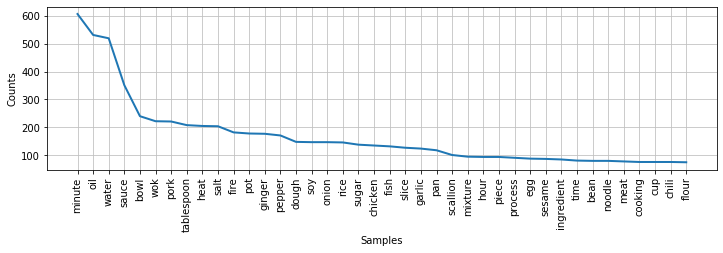

In [117]:
cn1 = FreqDist(nouns1)
print(sum(cn1.values()))  # 名词总数量
print(len(cn1))           # 名词的种类

# cn1_filter = cn1
# for k,v in list(cn1.items()):
#     if(k not in mats_set):
#         del cn1_filter[k]

# print(len(cn1))
# print(len(cn1_filter))
print([(k,v) for k,v in cn1.most_common(40)])

figsize(12, 3)
cn1.plot(40)

主题模型

In [134]:
from gensim.corpora.dictionary import Dictionary
dct = Dictionary(nv1)
corpus = [dct.doc2bow(text) for text in nv1]


In [135]:
from gensim.models import LdaModel

model = LdaModel(corpus, num_topics=2, id2word=dct, 
                 passes=100, random_state=0)

# model.print_topics()

In [136]:
# help(model)
model.show_topics(num_words=20)

[(0,
  '0.037*"add" + 0.029*"minute" + 0.028*"heat" + 0.025*"sauce" + 0.023*"oil" + 0.023*"cook" + 0.023*"stir" + 0.018*"chicken" + 0.013*"large" + 0.012*"bowl" + 0.012*"medium" + 0.011*"pepper" + 0.010*"water" + 0.010*"rice" + 0.010*"soy" + 0.010*"skillet" + 0.010*"garlic" + 0.010*"serve" + 0.009*"high" + 0.009*"onion"'),
 (1,
  '0.024*"add" + 0.015*"water" + 0.013*"sauce" + 0.010*"wrapper" + 0.009*"oil" + 0.009*"noodle" + 0.009*"shrimp" + 0.009*"fry" + 0.008*"heat" + 0.008*"soup" + 0.008*"stir" + 0.008*"cook" + 0.008*"minute" + 0.007*"boil" + 0.007*"bowl" + 0.007*"wonton" + 0.007*"serve" + 0.007*"mix" + 0.006*"pork" + 0.006*"step"')]

In [105]:
model.top_topics(corpus)

[([(0.03180053, 'add'),
   (0.024360998, 'oil'),
   (0.022098143, 'minute'),
   (0.020715002, 'sauce'),
   (0.019644465, 'fry'),
   (0.015761347, 'heat'),
   (0.01526977, 'wok'),
   (0.014990146, 'mix'),
   (0.014754385, 'stir'),
   (0.0129955225, 'cut'),
   (0.0124110505, 'tablespoon'),
   (0.0123941675, 'pan'),
   (0.012119387, 'pork'),
   (0.01180248, 'salt'),
   (0.011503017, 'small'),
   (0.009502537, 'fire'),
   (0.009433078, 'serve'),
   (0.008723269, 'bowl'),
   (0.008434908, 'pepper'),
   (0.008252443, 'transfer')],
  -0.5843982513608497),
 ([(0.034231298, 'add'),
   (0.02923378, 'water'),
   (0.027085243, 'minute'),
   (0.017575685, 'sauce'),
   (0.017351812, 'chicken'),
   (0.017328138, 'oil'),
   (0.0144344, 'fry'),
   (0.012695333, 'pot'),
   (0.011822727, 'transfer'),
   (0.011044551, 'serve'),
   (0.010912289, 'soak'),
   (0.010879555, 'heat'),
   (0.01068803, 'cook'),
   (0.010445426, 'fire'),
   (0.010183237, 'mix'),
   (0.009336968, 'large'),
   (0.008944287, 'green')